In [89]:
import scipy as scp
from numpy import random
from numpy import linalg

ncity=100

# random coordinates in 2D for n-cities
R = random.random((ncity,2))
city = list(range(ncity))

In [90]:
def Distance(R1,R2):
    return linalg.norm(R1-R2)

def TotalDistance(city, R):
    dist=0
    for i in range(len(city)-1):
        dist += Distance(R[city[i]],R[city[i+1]])
    dist += Distance(R[city[-1]],R[city[0]]) #마지막에서 처음으로 다시 돌아오는 거리
    return dist

In [91]:
def Plot(city, R, dist):
    Pt = [R[city[i]] for i in range(len(city))]
    Pt += [R[city[0]]]
    Pt = array(Pt)
    title('Total distance='+str(dist))
    plot(Pt[:,0],Pt[:,1],'o-')
    show()

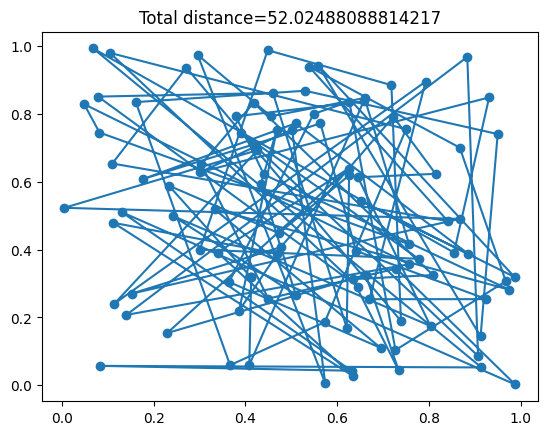

In [92]:
from pylab import *
Plot(city,R, TotalDistance(city,R))

In [93]:
def CostSwap(R, city, n, ncity) :
  if n == 0 :
    nm1 = len(city)-1
    np1 = n+1
    np2 = n+2
  elif n == len(city)-1 :
    nm1 = n-1
    np1 = 0
    np2 = 1
  elif n == len(city)-2 :
    nm1 = n-1
    np1 = n+1
    np2 = 0
  else :
    nm1 = n-1
    np1 = n+1
    np2 = n+2
  change = Distance(R[city[n]],R[city[np2]]) + Distance(R[city[np1]],R[city[nm1]]) - Distance(R[city[n]],R[city[nm1]]) - Distance(R[city[np1]],R[city[np2]])
  return change

In [94]:
def Swap(city, n, ncity) :
  if n == len(city)-1 :
    c = 0
  else :
    c = n+1
  temp = city[n]
  city[n],city[c]=city[c],city[n]
  return city

In [95]:
def TravelingSalesman(city, R, maxSteps, maxAccepted, Tstart, fCool, maxTsteps):
    T = Tstart
    dist = TotalDistance(city,R)
    for t in range(maxTsteps):
      accepted = 0
      for i in range(maxSteps):
        # Try swap
        n = random.randint(0,ncity-1)
        de = CostSwap(R, city, n, ncity)
        if de < 0 or exp(-de/T) > rand():
          accepted += 1
          dist += de
          city = Swap(city, n, ncity)
        if accepted > maxAccepted:
          break
      T *= fCool
      Plot(city, R, dist)
      print("T=%10.5f , distance=%10.5f acc.steps=%d" % (T, dist,accepted))
      if accepted == 0:
        break
      Plot(city, R, dist)
    return city

In [96]:
from numpy import random

ncity = 10
maxSteps = 100*ncity
maxAccepted = 10*ncity
Tstart = 0.2
fCool = 0.9
maxTsteps = 100

random.seed(0)

R = random.random((ncity,2))
city = list(range(ncity))

ncity = TravelingSalesman(city, R, maxSteps, maxAccepted, Tstart, fCool, maxTsteps)

Output hidden; open in https://colab.research.google.com to view.